In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [125]:
len(df)

5847

In [126]:
# count the null values in each column

null_value_count_df= pd.isnull(df).sum(axis=0)
null_value_count_df

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,36
Power,36


In [127]:
# drop New_Price as most of its values are null
df = df.drop('New_Price', axis=1)

Dropping the New Price column as most of it's values are missing

In [128]:
# function to remove the suffixes from columns
def remove_suffix_to_float(string):
  if type(string) == str:
    for index in range(len(string)):
      if string[index] == ' ':
        string = string[:index]
        break
  return float(string)

# Remove all suffixes from 'Mileage', 'Engine', 'Power' columns

In [129]:
replace_list = ['Mileage', 'Engine', 'Power']
for column in replace_list:
  df[column] = df[column].apply(lambda x: remove_suffix_to_float(x))

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


Drawing box plots to see how the data is spread

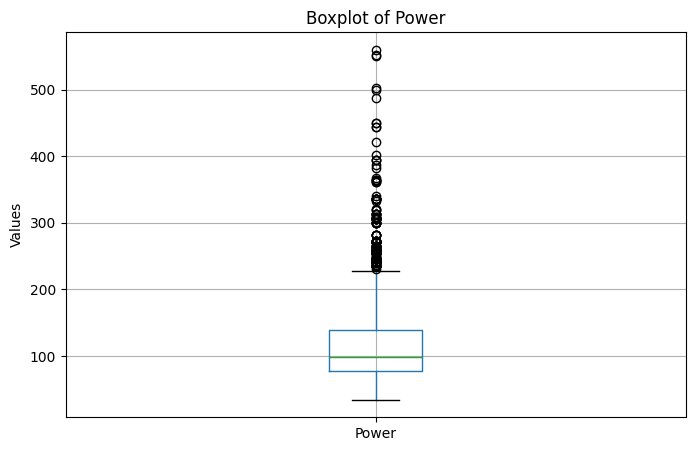

In [130]:
dataframe_for_box_plot = df[['Power']]

plt.figure(figsize=(8, 5))
dataframe_for_box_plot.boxplot()
plt.title("Boxplot of Power")
plt.ylabel("Values")
plt.savefig('Comparisonofmeanglucose.jpg', dpi=300, bbox_inches='tight')
plt.show()

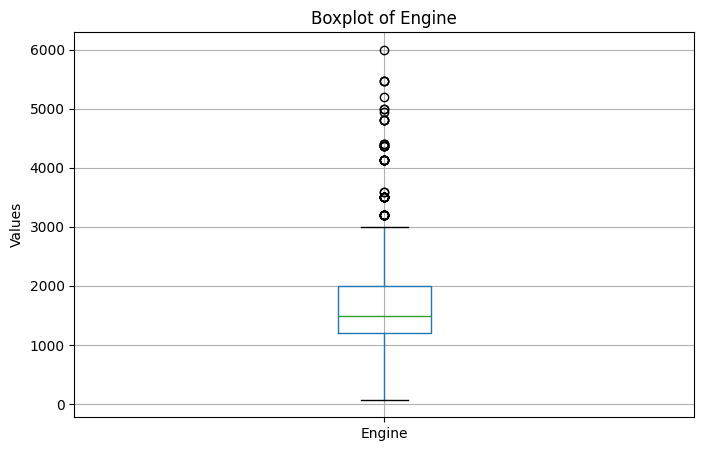

In [131]:
dataframe_for_box_plot = df[['Engine']]

plt.figure(figsize=(8, 5))
dataframe_for_box_plot.boxplot()
plt.title("Boxplot of Engine")
plt.ylabel("Values")
plt.savefig('Comparisonofmeanglucose.jpg', dpi=300, bbox_inches='tight')
plt.show()

Since Engine and Power values have many outlying values according to the box plot, replacing with mean will not be a good idea as the mean is influenced by outliers. So a good approach will be to replace with median

The number of seats is not a pure numerical variable as it's range is limited (mostly 4 - 7). So we are replacing the missing values in it with the mode.

In [132]:
# fill in missing values in Engine column with median
df["Engine"] = df["Engine"].fillna(df["Engine"].median())

# fill in missing values in Power column with median
df["Power"] = df["Power"].fillna(df["Power"].median())

# fill in missing values in Seats column with mode
df["Seats"] = df["Seats"].fillna(df["Seats"].mode())

I'm dropping the remaining 2 rows where mileage is missing as removing just two rows will not negatively affect any model's results in a big dataset

In [133]:
# drop the 2 rows with missing mileage values
df=df.dropna()

In [134]:
# save the cleaned data to a csv
df.to_csv("data_clean.csv", index=False)

# One hot encoding

In [135]:
# one hot encode Fuel_type and Transmission
df = pd.get_dummies(df, columns=["Fuel_Type", "Transmission"])

In [136]:
def calculate_age(year):
  return 2025 - year

# Adding one more feature

In [137]:
df["Age"] = df["Year"].apply(lambda x: calculate_age(x))

# Filter

In [138]:
# filter cars which was driven not more than 40,000 kilometers

df_filtered = df[df["Kilometers_Driven"] < 40000]

df_filtered.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,First,11.36,2755.0,171.50,8.0,17.50,True,False,True,False,9
10,Maruti Ciaz Zeta,Kochi,2018,25692,First,21.56,1462.0,103.25,5.0,9.95,False,True,False,True,7
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,First,28.40,1248.0,74.00,5.0,5.99,True,False,False,True,8
20,BMW 3 Series 320d,Kochi,2014,32982,First,22.69,1995.0,190.00,5.0,18.55,True,False,True,False,11
24,Volkswagen Vento Petrol Highline AT,Kolkata,2010,33000,First,14.40,1598.0,103.60,5.0,2.85,False,True,True,False,15


# Mutate

In [139]:
# Mutate the dataframe to create a mileage per litre column from preexisting mileage column
df_mutate = df.assign(mileage_per_litre = df["Mileage"] * 0.621371)
df_mutate.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age,mileage_per_litre
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,True,10,12.222368
2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,True,False,True,14,8.077823
3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,True,13,12.905876
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,True,False,12,9.444839
6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,True,12,14.341243


# Rename

In [140]:
# rename the Seats column to Seat Count
df_rename = df.rename(columns={"Seats": "Seat Count"})
df_rename.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seat Count,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67,1582.0,126.20,5.0,12.50,True,False,False,True,10
2,Honda Jazz V,Chennai,2011,46000,First,13.00,1199.0,88.70,5.0,4.50,False,True,False,True,14
3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77,1248.0,88.76,7.0,6.00,True,False,False,True,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.20,1968.0,140.80,5.0,17.74,True,False,True,False,12
6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08,1461.0,63.10,5.0,3.50,True,False,False,True,12


# Arrange

In [141]:
# sort dataframe with price
df_arrange = df.sort_values(by="Price", ascending=True)
df_arrange.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Age
1713,Tata Nano Lx,Pune,2011,65000,Second,26.0,624.0,35.0,4.0,0.44,False,True,False,True,14
2847,Hyundai Getz GLS,Pune,2005,86000,Second,15.3,1341.0,83.0,5.0,0.45,False,True,False,True,20
3138,Maruti Zen LXI,Jaipur,1998,95150,Third,17.3,993.0,60.0,5.0,0.45,False,True,False,True,27
1628,Maruti 800 Std BSIII,Jaipur,2004,12000,Second,16.1,796.0,37.0,4.0,0.45,False,True,False,True,21
3228,Maruti 800 Std,Pune,2003,52000,First,16.1,796.0,37.0,4.0,0.50,False,True,False,True,22


# Summarize

In [142]:
# group by the data by year and aggregate the mean value of mileage
df_summary = df.groupby("Year").agg(
    mean_val = ("Mileage", "mean"),
).reset_index()

df_summary

,Year,mean_val
0,1998,14.866667
1,1999,15.150000
2,2000,15.267500
3,2001,15.050000
4,2002,16.536364
5,2003,15.464286
6,2004,14.843200
7,2005,14.013095
8,2006,15.123485
9,2007,14.975481


From the above aggregation we can see that the average mileage has steadily increased as time progressed